<a href="https://colab.research.google.com/github/0323ali/Machine-Learning/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance pandas matplotlib statsmodels


In [2]:
import yfinance as yf
import pandas as pd

# Download historical ETH/USDT data
eth_data = yf.download('ETH-USD', start='2020-01-01', end='2025-04-01', interval='1d')
eth_data = eth_data[['Open', 'High', 'Low', 'Close', 'Volume']]
eth_data.dropna(inplace=True)
eth_data.index = pd.to_datetime(eth_data.index)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


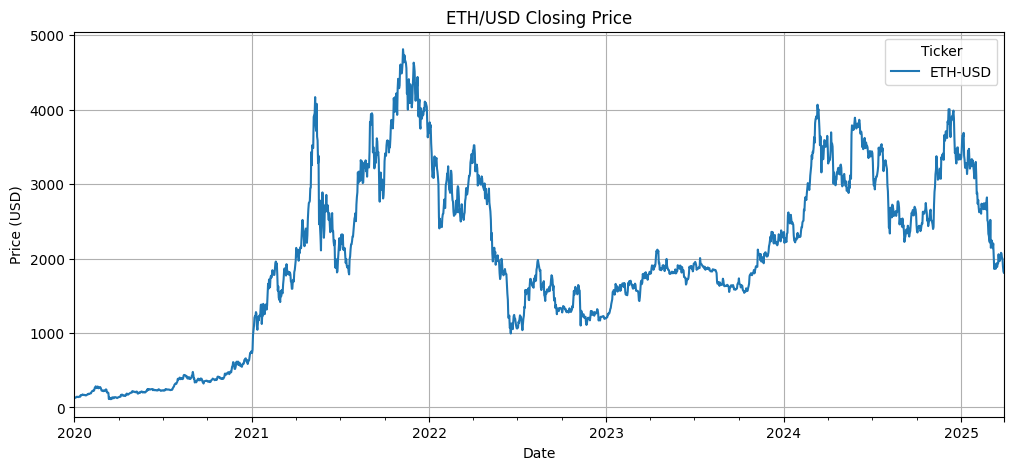

<Axes: title={'center': '30-Day Moving Average'}, xlabel='Date'>

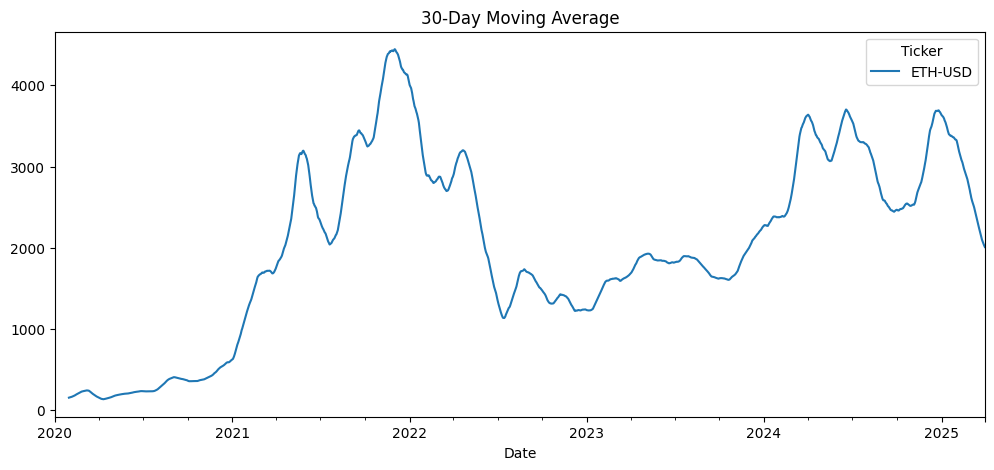

In [3]:
import matplotlib.pyplot as plt

eth_data['Close'].plot(figsize=(12, 5), title='ETH/USD Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid()
plt.show()

eth_data['Close'].rolling(30).mean().plot(figsize=(12, 5), title='30-Day Moving Average')


In [4]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(eth_data['Close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -2.202462413474427
p-value: 0.20535295704009943


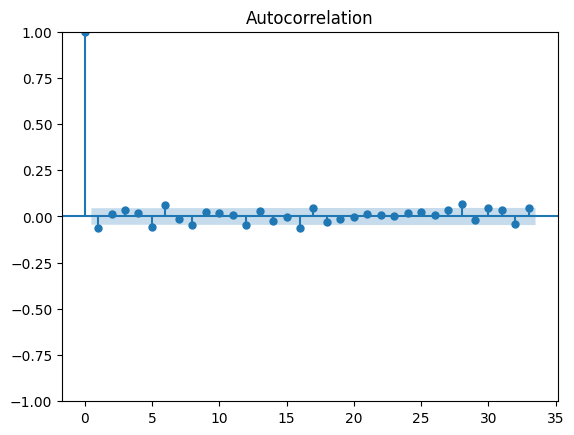

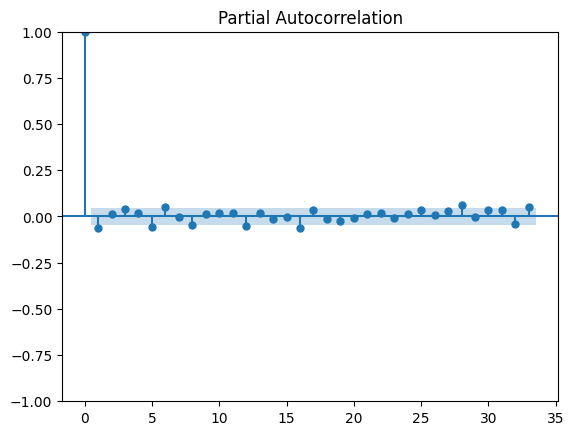

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# First difference to make stationary
eth_diff = eth_data['Close'].diff().dropna()

plot_acf(eth_diff)
plot_pacf(eth_diff)
plt.show()


In [6]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(eth_data['Close'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                ETH-USD   No. Observations:                 1917
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11416.043
Date:                Mon, 28 Apr 2025   AIC                          22838.086
Time:                        17:06:11   BIC                          22854.760
Sample:                    01-01-2020   HQIC                         22844.222
                         - 03-31-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1504      0.219     -0.687      0.492      -0.580       0.279
ma.L1          0.0896      0.221      0.405      0.686      -0.344       0.524
sigma2      8783.5973    125.355     70.070      0.0

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Predict on test set (e.g., last 30 days)
predicted = model_fit.predict(start=-30, end=len(eth_data)-1, typ='levels')
actual = eth_data['Close'].iloc[-30:]

rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = mean_absolute_percentage_error(actual, predicted)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")


RMSE: 108.53311157735443
MAPE: 0.03451047027782907


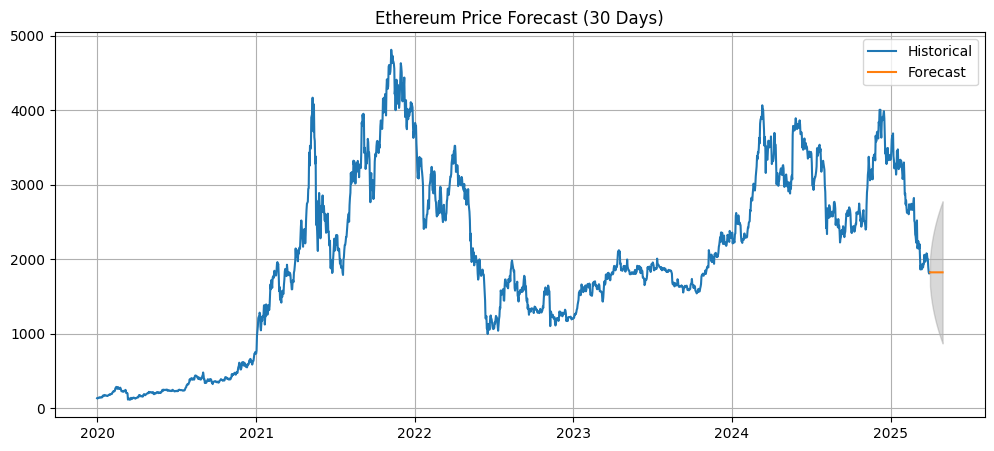

In [9]:
forecast = model_fit.get_forecast(steps=30)
forecast_df = forecast.conf_int()
forecast_df['Forecast'] = forecast.predicted_mean

# Rename columns to match expected format
forecast_df.rename(columns={'lower ETH-USD': 'lower Close', 'upper ETH-USD': 'upper Close'}, inplace=True)

# Plot forecast
plt.figure(figsize=(12, 5))
plt.plot(eth_data['Close'], label='Historical')
plt.plot(forecast_df['Forecast'], label='Forecast')
plt.fill_between(forecast_df.index, forecast_df['lower Close'], forecast_df['upper Close'], color='gray', alpha=0.3)
plt.legend()
plt.title('Ethereum Price Forecast (30 Days)')
plt.grid()
plt.show()